James Somerville

May 3, 2024

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 opencv-python==4.8.0.76 keras -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                # Importing the optimizers which can be used in our model
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

import random

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
baseDir = '/content/drive/MyDrive/Colab Notebooks/Intro to Computer Vision Module/Project 5/'

# Load the image file of the dataset
images = np.load(baseDir + 'images.npy')

# Load the labels file of the dataset
labels = pd.read_csv(baseDir + 'Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [6]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4,750 images with dimensions of 128 pixels by 128 pixels and 3 color channels.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

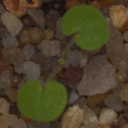

In [7]:
cv2_imshow(images[5])

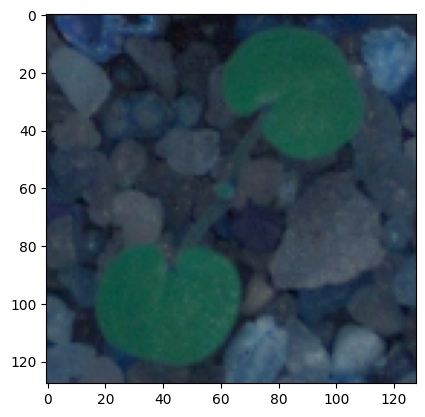

In [8]:
plt.imshow(images[5])

The images are in BGR format. So will need to convert to RGB.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [9]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [10]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

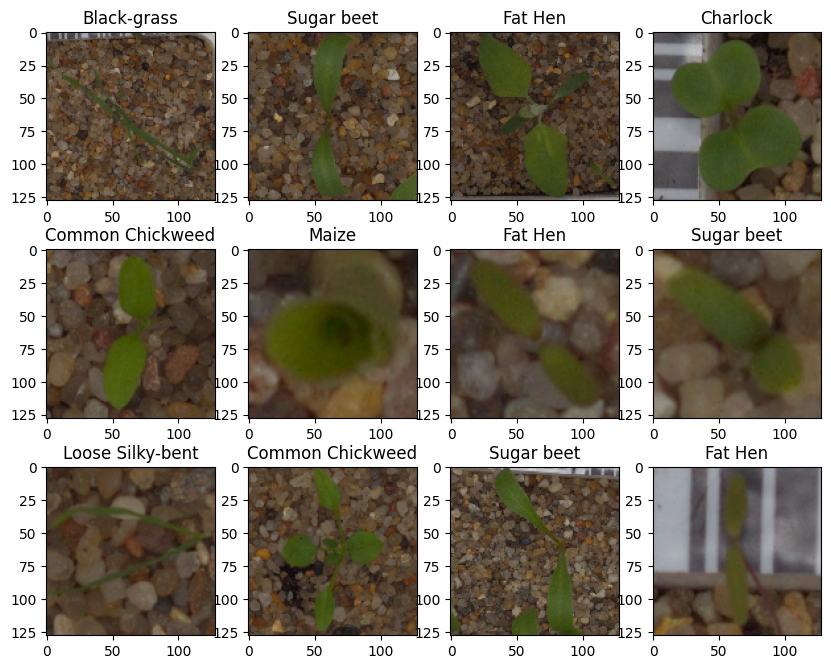

In [11]:
plot_images(images,labels)

These are all small green low to the ground. However, there leaves are different shapes and quantity. These may be distinguishing features for the CNN.

<b> Checking for data imbalance

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

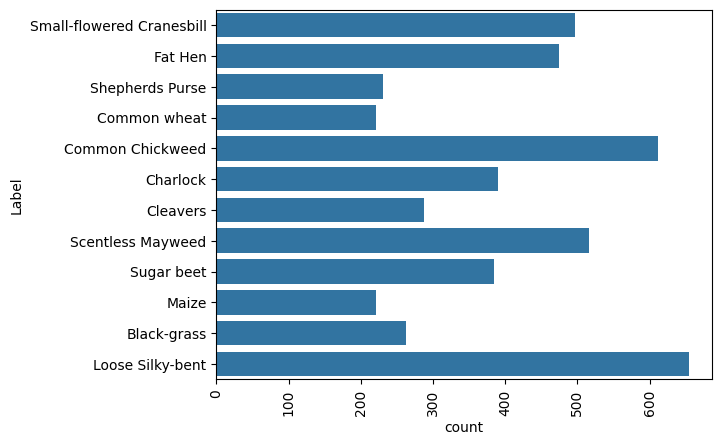

In [12]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

The count of images per class is not consistent. The largest class, Loose Silky-bent, has over 3 times the quantity of images as the lowest, Maize. Data augmentation will help with this.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [13]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

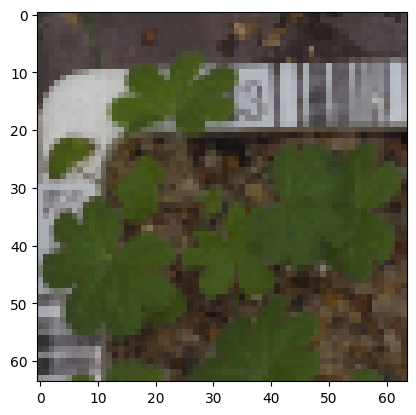

In [14]:
plt.imshow(images_decreased[3])

Some of the detail has been lost. However the shape and quantity of leaves is still discernible.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

The data will be split into approximately:
*   80% training
*   10% validation
*   10% testing

In [15]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [16]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [17]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [18]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [19]:
# prompt: Create a function to clear keras backend session and set a random seed for numpy, random, and tensorflow
def reset_keras_set_random_seeds(seed=42):
  # Clear keras backend session
  tf.keras.backend.clear_session()

  # Set random seeds for numpy, random, and tensorflow
  np.random.seed(seed)
  random.seed(seed)
  tf.random.set_seed(seed)


In [20]:
reset_keras_set_random_seeds()

In [21]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

### <b> Fitting the model on the train data

In [22]:
history = model.fit(
  X_train_normalized, y_train_encoded,
  epochs=30,
  validation_data=(X_val_normalized,y_val_encoded),
  batch_size=32,
  verbose=2
)

Epoch 1/30
121/121 - 6s - loss: 2.4501 - accuracy: 0.1287 - val_loss: 2.3817 - val_accuracy: 0.1402 - 6s/epoch - 53ms/step
Epoch 2/30
121/121 - 1s - loss: 2.2593 - accuracy: 0.1739 - val_loss: 2.1032 - val_accuracy: 0.3154 - 911ms/epoch - 8ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0370 - accuracy: 0.2506 - val_loss: 1.9072 - val_accuracy: 0.3505 - 851ms/epoch - 7ms/step
Epoch 4/30
121/121 - 1s - loss: 1.9438 - accuracy: 0.2805 - val_loss: 1.7981 - val_accuracy: 0.3621 - 838ms/epoch - 7ms/step
Epoch 5/30
121/121 - 1s - loss: 1.9096 - accuracy: 0.2844 - val_loss: 1.7111 - val_accuracy: 0.3692 - 809ms/epoch - 7ms/step
Epoch 6/30
121/121 - 1s - loss: 1.8808 - accuracy: 0.2987 - val_loss: 1.6835 - val_accuracy: 0.3879 - 708ms/epoch - 6ms/step
Epoch 7/30
121/121 - 1s - loss: 1.8501 - accuracy: 0.2922 - val_loss: 1.6554 - val_accuracy: 0.4112 - 708ms/epoch - 6ms/step
Epoch 8/30
121/121 - 1s - loss: 1.8226 - accuracy: 0.3138 - val_loss: 1.6245 - val_accuracy: 0.4112 - 709ms/epoch - 6ms/step
Ep

### **Model Evaluation**

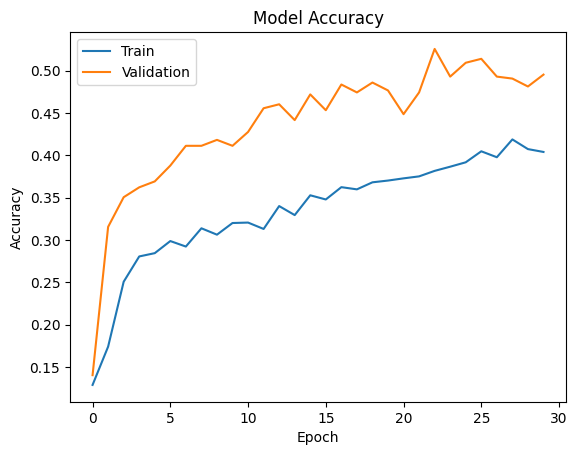

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
*   The model is actually performing better on the validation dataset than training.
*   They are starting to converge after 30 epochs.
*  The valication accuracy is mediocre at just under 60%.

### **Evaluating the model on test data**

In [24]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.5003 - accuracy: 0.4926 - 154ms/epoch - 10ms/step


Test data accuracy is 58%.

### **Generating the predictions using test data**

In [25]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 2ms/step


In [26]:
y_pred

array([[2.42545561e-09, 2.29159855e-06, 7.23887788e-05, ...,
        2.52152942e-02, 6.40033136e-07, 7.29964464e-04],
       [6.79665118e-06, 2.31081527e-03, 3.91012952e-02, ...,
        1.07210875e-02, 8.70992601e-01, 4.92603257e-02],
       [1.04107696e-03, 7.89843674e-04, 4.36198935e-02, ...,
        6.56328863e-03, 6.54363334e-01, 1.48195699e-01],
       ...,
       [2.08655402e-01, 2.38571033e-07, 4.25923536e-05, ...,
        1.92753657e-09, 8.92994990e-07, 4.29790671e-04],
       [1.82894571e-03, 1.32566122e-02, 4.03246805e-02, ...,
        8.71815383e-02, 6.02522725e-03, 8.44058916e-02],
       [3.98618504e-05, 4.80144918e-02, 1.50169060e-01, ...,
        1.20967835e-01, 3.98286045e-01, 1.25686735e-01]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

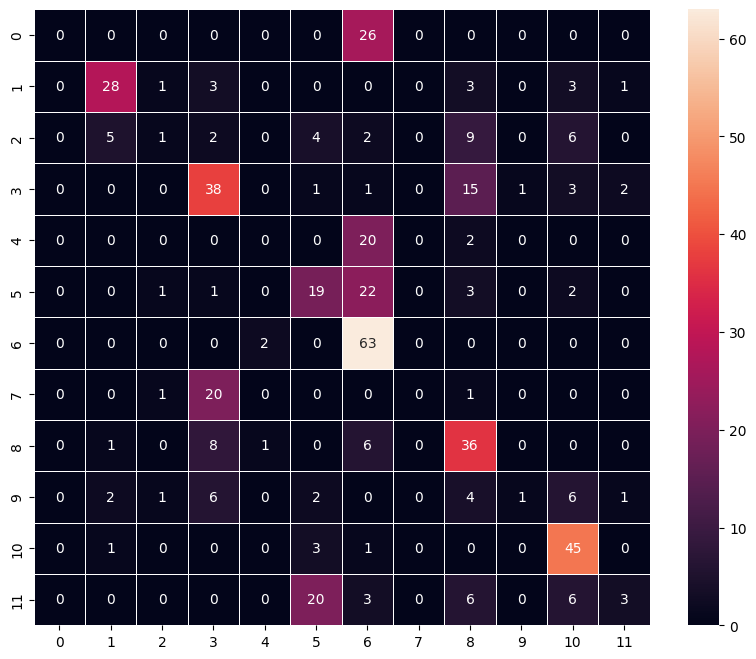

In [27]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly.
- In comparison to the rest, we can see that classes 1, 3, 8, and 10 are well classified.
- We can also observe that classes 2, 4, 6, and 9 have many mis-classifications.

## Model Performance Improvement

In [28]:
reset_keras_set_random_seeds()

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [29]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

### **Data Augmentation**

Data augmentation will only be used in the validation/test data set.

In [30]:
# prompt: Create a train_datagen variable with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [31]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

### <b> Fitting the model on the train data

In [32]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,
                                        callbacks=[reduce_lr])

Epoch 1/25
60/60 [==============================] - 8s 110ms/step - loss: 2.4552 - accuracy: 0.1184 - val_loss: 2.4225 - val_accuracy: 0.1005 - lr: 0.0010
Epoch 2/25
60/60 [==============================] - 6s 100ms/step - loss: 2.3770 - accuracy: 0.1472 - val_loss: 2.2925 - val_accuracy: 0.2991 - lr: 0.0010
Epoch 3/25
60/60 [==============================] - 5s 77ms/step - loss: 2.2803 - accuracy: 0.2112 - val_loss: 2.1656 - val_accuracy: 0.2874 - lr: 0.0010
Epoch 4/25
60/60 [==============================] - 7s 115ms/step - loss: 2.1909 - accuracy: 0.2181 - val_loss: 2.1243 - val_accuracy: 0.2780 - lr: 0.0010
Epoch 5/25
60/60 [==============================] - 5s 90ms/step - loss: 2.1319 - accuracy: 0.2331 - val_loss: 2.0031 - val_accuracy: 0.3061 - lr: 0.0010
Epoch 6/25
60/60 [==============================] - 6s 98ms/step - loss: 2.0688 - accuracy: 0.2432 - val_loss: 1.9594 - val_accuracy: 0.3458 - lr: 0.0010
Epoch 7/25
60/60 [==============================] - 4s 75ms/step - loss: 

### **Model Evaluation**

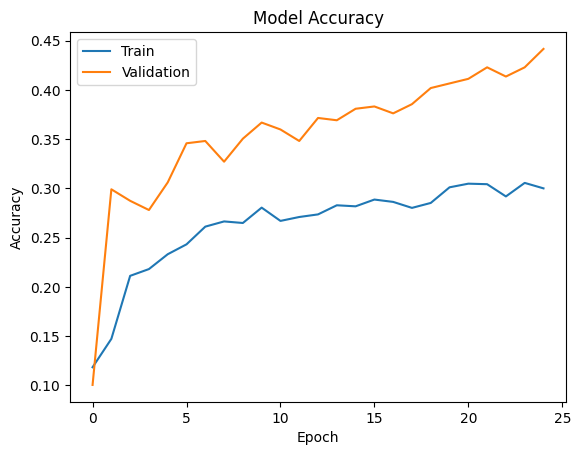

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The data augmented model shows similar patterns and accuracy results.

### **Evaluating the model on test data**

In [34]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.6382 - accuracy: 0.4463 - 69ms/epoch - 5ms/step


Accuracy is 60%. An improvement of under 2% over the previous model.

### **Generating the predictions using test data**

In [35]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


In [36]:
y_pred

array([[4.65289301e-15, 1.09555662e-01, 4.61823045e-04, ...,
        5.87826818e-02, 9.28807445e-03, 1.22002168e-02],
       [8.48004056e-05, 5.93250506e-02, 4.63850610e-03, ...,
        1.29710346e-01, 3.57931465e-01, 6.28463775e-02],
       [6.88369837e-05, 4.41971906e-02, 2.70033930e-03, ...,
        1.22852676e-01, 4.29634005e-01, 5.28055988e-02],
       ...,
       [1.88342750e-01, 1.99118303e-03, 5.78107685e-02, ...,
        6.66508800e-04, 8.97006877e-03, 8.15617070e-02],
       [3.91903886e-04, 1.59153044e-01, 6.25901595e-02, ...,
        8.69996995e-02, 6.51951954e-02, 9.00777206e-02],
       [5.50137134e-04, 1.04306743e-01, 1.99020393e-02, ...,
        1.25596598e-01, 2.11385012e-01, 9.04820859e-02]], dtype=float32)

### **Plotting the Confusion Matrix**

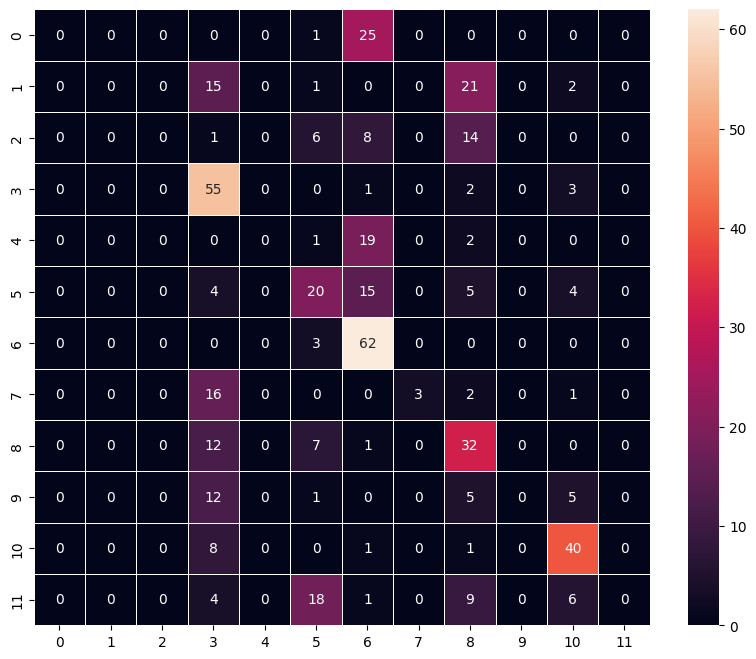

In [37]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Similar results are seen in the confusion matrix with the previous model. Classes 1,6, and 8 perform poorly.

## Final Model

Due to the slightly higher accuracy, the augmented data model is chosen.

### Visualizing the prediction

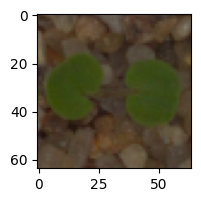

1/1 [==============================] - 0s 192ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


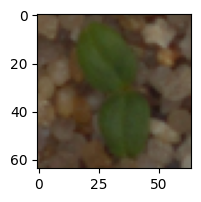

1/1 [==============================] - 0s 24ms/step
Predicted Label ['Scentless Mayweed']
True Label Cleavers


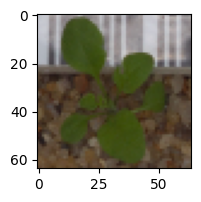

1/1 [==============================] - 0s 24ms/step
Predicted Label ['Common Chickweed']
True Label Shepherds Purse


In [38]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

As expected, most plants are classified correctly, but some are not.

## Actionable Insights and Business Recommendations

* The model can help predict seedling plants properly 60% of the time amongst 12 classes. This is decent performance.
* This could be good enough to indicate problem areas in farm fields where weeds are abundant and need to be treated. It could also indicate bare patches where desired plants are not growing or have died.
* More plant images may help train the model. The image dataset is quite small.

_____